## Gradient Descent for Linear Regression: A NumPy and Matplotlib Implementation

### Introduction
This notebook demonstrates the implementation of gradient descent for optimizing a linear regression model, entirely from scratch, using only NumPy and Matplotlib. The objective is to predict a target variable (y) based on an input feature (x) using the linear function:
$$y = mx + c $$
Where 

$m$: The slope of the line. It represents the rate of change of $y$ with respect to $x$

$c$: The y-intercept. It represents the point where the line crosses the y-axis (when $x$ = 0)

In this notebook includes:

- Initialize parameters (weight and bias) randomly.
- Compute predictions and calculate the Mean Squared Error (MSE) loss.
- Derive gradients of the loss function with respect to the parameters.
- Update the parameters iteratively using the gradient descent algorithm.
- Visualize the data, predictions, and loss convergence using Matplotlib.

This project highlights the fundamental workings of linear regression and gradient descent without relying on deep learning frameworks, offering insights into the mathematical foundations of optimization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f_x(m, c, x, inc_noise=False):
    '''
    Linear function y = mx + c + noise (optional)
    '''
    # Draw random samples from a normal (Gaussian) distribution as noise
    noise = np.random.normal(loc=np.median(x), scale=3.0, size=len(x)) if inc_noise else 0.0

    return m*x + c + noise

def plot_xy(x, y, w=0.0, b=0.0, inc_y_hat=True):
    '''
    Plot x and y values
    '''
    fig, ax = plt.subplots(figsize=(15,4))
    ax.scatter(x, y, label='y', c='green')
    plt.title("y vs. x")
    plt.xlabel("x value")
    plt.ylabel("y value")

    # Get minimum and maximum values of x    
    x_min, x_max = ax.get_xlim()
    
    # Calculate minimum and maximum values of y with weight and bias
    if inc_y_hat:
        y_min = f_x(w, b, x_min)
        y_max = f_x(w, b, x_max)
        ax.set_xlim([x_min, x_max])
        ax.plot([x_min, x_max], [y_min, y_max], label='y_hat')    
        plt.legend()

#### Define $x$, $m$ and $c$ then calculate $y$

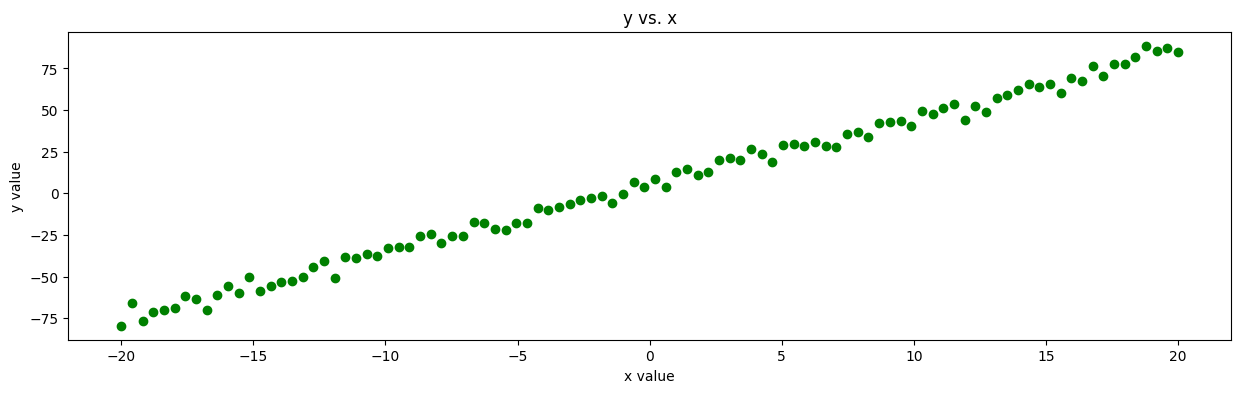

In [3]:
# Define m, c and x
x = np.linspace(-20, 20, num=100, dtype=np.float32)
m = 4.0
c = 5.0

# Calculate y
y = f_x(m, c, x, inc_noise=True)
plot_xy(x, y, inc_y_hat=False)

## Let's use manual gradient descent to find $m$ and $c$ when given only $x$ , $y$ 

In [4]:
'''
Randomly initial values for m and c
1. weight (w) is a parameter to represent "m" 
2. bias (b) is a parameter to represent "c"
'''

w = np.random.rand(1) 
b = np.random.rand(1) 
print(f'Initial weight and bias = {w} and {b} respectively')

Initial weight and bias = [0.17319643] and [0.24124493] respectively


### Step 1: Forward pass 

Calculate $\hat{y}$ using initial weight and bias

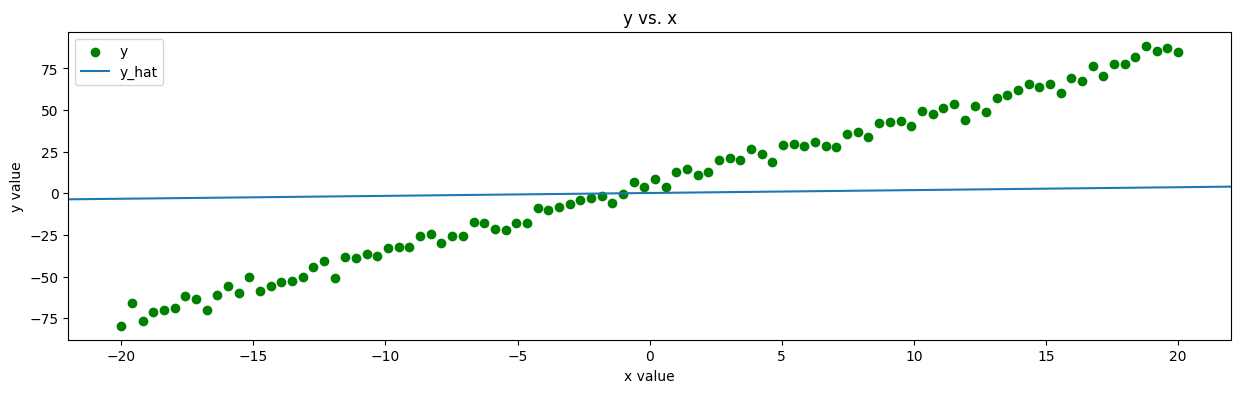

In [5]:
y_hat = f_x(w, b, x)
plot_xy(x, y, w, b)

### Step 2: Calculate cost C
let's use mean squared error (MSE) as the cost function: $$C = \frac{1}{n} \sum_{i=1}^n (\hat{y_i}-y_i)^2 $$

In [6]:
def mse(y_hat, y):
    return np.mean((y_hat - y)**2)

initial_C = mse(y_hat, y)
print(f"Initial cost = {initial_C:.2f}")

Initial cost = 2067.28


### Step 3: Calculate gradient of C with repect to weight ($w$) and bias ($b$)
$$\hat{y} = wx + b $$

$$ \frac{\partial \hat{y}}{\partial w} = x$$

$$ \frac{\partial \hat{y}}{\partial b} = 1 $$

$$ \frac{\partial C}{\partial \hat{y}} = \frac{2}{n} \sum_{i=1}^n (\hat{y}_i - y_i) $$

#### Apply chain rule to calculate gradient

$$ \frac{\partial C}{\partial w} = \frac{\partial C}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial w} = \frac{2}{n} \sum_{i=1}^n (\hat{y}_i - y_i) \cdot x_i $$

$$ \frac{\partial C}{\partial b} = \frac{\partial C}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial b} = \frac{2}{n} \sum_{i=1}^n (\hat{y}_i - y_i) $$

In [7]:
dw = 2 * np.mean((y_hat - y) * x)  
db = 2 * np.mean(y_hat - y)

print(f'Gradient of C with repect to weight (w) = {dw:.2f}')
print(f'Gradient of C with repect to bias (b) = {db:.2f}')

Gradient of C with repect to weight (w) = -1051.57
Gradient of C with repect to bias (b) = -9.63


### Step 4: Gradient descent
$$w = w - \alpha \frac{\partial C}{\partial w}$$
$$b = b - \alpha \frac{\partial C}{\partial b}$$

Where

$\alpha$: learning rate

In [8]:
# Define learning rate = 0.001
lr = 1e-3

w = w - (lr*dw)
b = b - (lr*db) 

Calculate $\hat{y}$ using updated weight and bias

In [9]:
y_hat = f_x(w, b, x)
updated_C = mse(y_hat, y)
print(f"Updated cost = {updated_C:.2f} which is {(abs(updated_C - initial_C) * 100/ initial_C):.2f}% lower than initial cost")

Updated cost = 1111.81 which is 46.22% lower than initial cost


### Combine all the steps

In [10]:
epochs = 2000
epoch_cost = {}
for epoch in range(epochs):
    
    # Step 1: Forward pass
    y_hat = f_x(w, b, x)

    # Step 2: Calculate cost (C)
    C = mse(y_hat, y)

    # Step 3: Calculate gradient
    dw = 2 * np.mean((y_hat - y) * x)  
    db = 2 * np.mean(y_hat - y)

    # Step 4: Gradient descent
    w = w - (lr*dw)
    b = b - (lr*db)

    if epoch > 0 and epoch % 100 == 0:
        epoch_cost[epoch] = C
        print(f'epoch:{epoch}, cost:{C:.2f}, w grad:{dw:.4f}, b grad:{db:.4f}')

epoch:100, cost:27.26, w grad:-0.0000, b grad:-7.8636
epoch:200, cost:22.16, w grad:-0.0000, b grad:-6.4369
epoch:300, cost:18.74, w grad:-0.0000, b grad:-5.2690
epoch:400, cost:16.45, w grad:-0.0000, b grad:-4.3131
epoch:500, cost:14.92, w grad:-0.0000, b grad:-3.5305
epoch:600, cost:13.89, w grad:-0.0000, b grad:-2.8900
epoch:700, cost:13.20, w grad:-0.0000, b grad:-2.3656
epoch:800, cost:12.74, w grad:-0.0000, b grad:-1.9364
epoch:900, cost:12.43, w grad:-0.0000, b grad:-1.5851
epoch:1000, cost:12.22, w grad:-0.0000, b grad:-1.2975
epoch:1100, cost:12.08, w grad:-0.0000, b grad:-1.0621
epoch:1200, cost:11.99, w grad:-0.0000, b grad:-0.8694
epoch:1300, cost:11.93, w grad:-0.0000, b grad:-0.7117
epoch:1400, cost:11.88, w grad:-0.0000, b grad:-0.5825
epoch:1500, cost:11.86, w grad:-0.0000, b grad:-0.4768
epoch:1600, cost:11.84, w grad:-0.0000, b grad:-0.3903
epoch:1700, cost:11.83, w grad:-0.0000, b grad:-0.3195
epoch:1800, cost:11.82, w grad:-0.0000, b grad:-0.2615
epoch:1900, cost:11

#### Plot cost per epoch

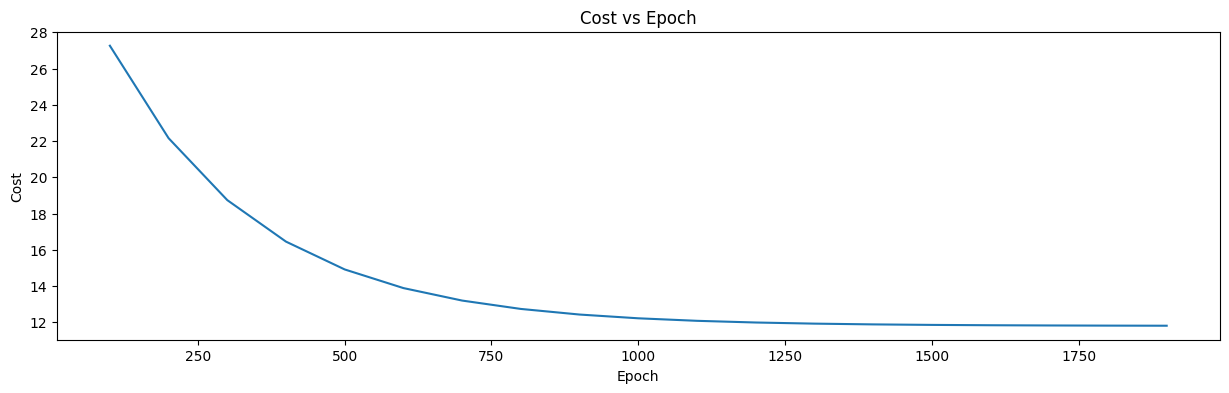

In [11]:
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(epoch_cost.keys(), epoch_cost.values())
plt.title('Cost vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost');

#### Compare $y$ and $\hat{y}$

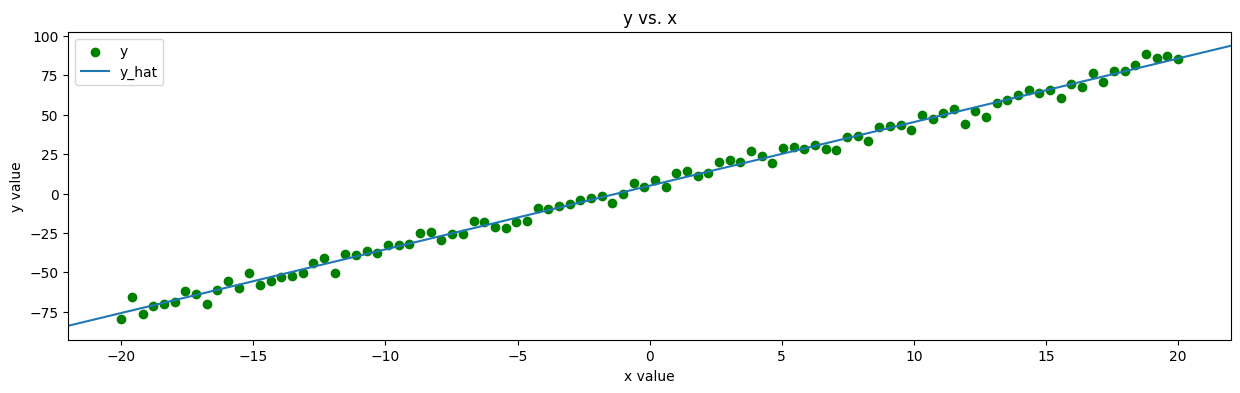

In [12]:
plot_xy(x, y, w, b)

#### Compare final weight and bias with user-defined $m$ and $c$

In [13]:
print(f'm: {m}')
print(f'final weight (w) = {np.squeeze(w)} \n')
print(f'c: {c}')
print(f'final bias (b) = {np.squeeze(b)}')

m: 4.0
final weight (w) = 4.0384922477009635 

c: 5.0
final bias (b) = 4.966534137658679


---